### REGRESSION IN KERAS

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### GENERATE THE DATASET

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,Y= make_regression(n_samples=1000,n_features=10,n_informative=6,noise=10,random_state=42)

In [4]:
X

array([[ 1.12790899,  0.49470565,  0.0443588 , ...,  0.38343503,
         1.00592451,  0.15449367],
       [-0.49665105,  1.26961326, -1.2774366 , ..., -1.24515058,
        -0.14358159,  0.92304483],
       [ 0.6686548 , -0.73095628, -0.53533509, ...,  0.75792185,
         1.84860883,  0.09806754],
       ...,
       [-0.83418485,  0.67229341, -2.4036686 , ..., -1.50047655,
         1.6722659 , -2.26605209],
       [ 0.8896308 ,  1.44697788, -0.18687164, ...,  0.19655478,
        -1.48556037,  0.08228399],
       [ 1.60734558,  0.86047349,  0.3074067 , ..., -0.58307744,
         0.28257995,  0.49097495]])

In [5]:
Y

array([-2.62582272e+01,  4.07633307e+01,  3.51849040e+01,  9.18539795e+00,
       -1.17149738e+02,  1.16687987e+02, -5.76432966e+01, -1.87389866e+02,
       -1.01386154e+02,  4.86377872e+01,  1.58474643e+01,  4.74463777e+01,
       -9.20044905e+01, -1.03449820e+02, -9.79708735e+01, -1.07152945e+02,
        8.41589920e+01, -1.59284032e+01, -8.75763995e+01, -9.35469442e+01,
        1.17947308e+02,  8.27442365e+01,  1.37827792e+02,  8.12022225e+01,
       -6.30615548e+01,  1.82714823e+02, -1.86302211e+02, -9.00608006e+01,
        3.32200126e+01, -5.43175812e+00, -1.30630067e+02,  1.01759737e+01,
        1.47207281e+01,  1.16321893e+01, -9.26385260e+01, -4.68970962e+01,
       -3.75960961e+01, -2.66787086e+01,  2.09257954e-01,  6.09708208e+01,
        4.76958379e+01,  6.65711234e-02, -6.60998640e+01,  8.67880911e+01,
        1.33424638e+00,  2.94622941e+01, -4.25075516e+01, -9.19587342e+01,
       -2.06770678e+01,  9.47502943e+01,  7.58011700e+01, -3.40262501e+01,
        6.13882732e+01,  

In [6]:
import pandas as pd

In [7]:
X = pd.DataFrame(X)

In [8]:
cols= {f'x{i+1}'for i in range(10)}
cols

{'x1', 'x10', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'}

In [9]:
X.columns=cols

In [10]:
X.head()

,x1,x5,x9,x4,x7,x6,x8,x3,x10,x2
0,1.127909,0.494706,0.044359,-1.745707,-0.336553,-0.409308,-1.127496,0.383435,1.005925,0.154494
1,-0.496651,1.269613,-1.277437,1.156582,0.406094,1.357620,0.418515,-1.245151,-0.143582,0.923045
2,0.668655,-0.730956,-0.535335,0.358454,1.295872,0.685508,-0.175564,0.757922,1.848609,0.098068
3,2.121631,0.729773,0.314445,-0.358958,-2.025040,0.043031,-2.065303,-0.931002,0.686858,-0.283152
4,-0.123729,-0.856498,-0.993863,0.420192,-1.184031,-1.264498,-0.382817,0.097670,-1.793106,-0.397680


In [11]:
Y= pd.DataFrame(Y)

In [12]:
Y.columns={'Y'}

### PREPROCESSING ON X DATAFRAME SCIKIT LEARN PIPELINES

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [15]:
X_pre= num_pipe.fit_transform(X)
X_pre

array([[ 1.08924995,  0.5262603 ,  0.03340657, ...,  0.43392418,
         0.99871794,  0.18005449],
       [-0.4873097 ,  1.31467041, -1.28190467, ..., -1.22297029,
        -0.11030302,  0.95923927],
       [ 0.64356521, -0.72075836, -0.54344359, ...,  0.81492051,
         1.81172327,  0.12284766],
       ...,
       [-0.81487048,  0.70694246, -2.40261186, ..., -1.48273446,
         1.64159107, -2.27398178],
       [ 0.85801209,  1.49512555, -0.19668956, ...,  0.24379548,
        -1.40501786,  0.10684572],
       [ 1.55452077,  0.89840152,  0.29516407, ..., -0.54938868,
         0.30084928,  0.52119131]])

In [16]:
cols= num_pipe.get_feature_names_out()
cols

array(['x1', 'x5', 'x9', 'x4', 'x7', 'x6', 'x8', 'x3', 'x10', 'x2'],
      dtype=object)

In [17]:
X_pre= pd.DataFrame(X_pre,columns=cols)
X_pre

,x1,x5,x9,x4,x7,x6,x8,x3,x10,x2
0,1.089250,0.526260,0.033407,-1.749812,-0.396542,-0.417858,-1.091289,0.433924,0.998718,0.180054
1,-0.487310,1.314670,-1.281905,1.108072,0.389484,1.327879,0.408652,-1.222970,-0.110303,0.959239
2,0.643565,-0.720758,-0.543444,0.322156,1.331236,0.663828,-0.167724,0.814921,1.811723,0.122848
3,2.053611,0.765424,0.302167,-0.384280,-2.183658,0.029057,-2.001149,-0.903361,0.690889,-0.263646
4,-0.125406,-0.848488,-0.999722,0.382949,-1.293523,-1.262791,-0.368801,0.143192,-1.701732,-0.379759
...,...,...,...,...,...,...,...,...,...,...
995,-0.249440,1.237851,-1.728075,-0.698012,1.465124,-0.472293,0.762655,-0.954397,0.474009,-0.582354
996,0.284636,0.082322,-0.036104,-0.244650,1.969314,-0.352548,0.947319,-0.570531,-1.984110,-0.760734
997,-0.814870,0.706942,-2.402612,1.340338,-0.411599,-1.474500,-0.712798,-1.482734,1.641591,-2.273982
998,0.858012,1.495126,-0.196690,-0.463817,1.087387,1.006011,0.261701,0.243795,-1.405018,0.106846


In [18]:
X_pre.mean()

x1    -5.084821e-17
x5     2.153833e-17
x9    -5.939693e-18
x4    -3.552714e-18
x7     1.110223e-17
x6    -1.587619e-17
x8    -2.137179e-18
x3     9.048318e-17
x10   -8.248957e-17
x2    -4.218847e-18
dtype: float64

In [19]:
X_pre.std()

x1     1.0005
x5     1.0005
x9     1.0005
x4     1.0005
x7     1.0005
x6     1.0005
x8     1.0005
x3     1.0005
x10    1.0005
x2     1.0005
dtype: float64

### TRAINTEST SPLIT

In [20]:
from sklearn.model_selection import  train_test_split

In [21]:
xtrain,xtest,ytrain,ytest= train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [22]:
xtrain.head()

,x1,x5,x9,x4,x7,x6,x8,x3,x10,x2
29,-0.817857,1.525604,0.283440,-1.524252,-0.610945,0.200718,-0.568710,-1.144254,-1.030434,-0.592863
535,-0.967141,0.009196,0.767372,-0.095223,-1.813786,-0.309557,0.374637,-1.082147,-0.708355,1.371617
695,0.704996,-0.968161,-0.432255,-1.375537,-0.532049,-1.305149,-0.608642,0.759479,-1.513374,-0.176223
557,-0.902258,0.372713,-0.969766,-0.973320,1.055390,0.018945,-0.220926,-0.005674,-0.703560,0.925938
836,1.571342,-0.634285,-0.192734,1.323027,-0.307425,-0.490412,0.121624,-0.769260,-0.891531,0.350973


In [23]:
ytrain.head()

,Y
29,-5.431758
535,-17.953733
695,-109.987597
557,-45.604222
836,-61.715412


In [24]:
xtrain.shape

(800, 10)

In [25]:
xtest.shape

(200, 10)

### CREATE KERAS MODEL

In [26]:
from keras.layers import Dense
from keras.models import Sequential

In [27]:
## initialize neural network
nn=Sequential() 

## Start adding the layers one by one or hidden layer 1
nn.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))

## Hidden layer 2
nn.add(Dense(32,activation='relu'))

## output layer
nn.add(Dense(1,activation='linear'))

### COMPILE THE MODEL

In [28]:
nn.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [29]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### MODEL IS READY TO FIT AND FILL THE NEURAL NETWORK

In [30]:
hist= nn.fit(xtrain,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100


20/20 [==============================] - 3s 22ms/step - loss: 4996.5811 - mae: 56.5674 - val_loss: 4320.5781 - val_mae: 52.9979
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 4955.8242 - mae: 56.3247 - val_loss: 4278.6748 - val_mae: 52.7414
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 4895.9663 - mae: 55.9436 - val_loss: 4206.7944 - val_mae: 52.3024
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 4786.0562 - mae: 55.2724 - val_loss: 4081.4578 - val_mae: 51.5155
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 4610.4351 - mae: 54.1087 - val_loss: 3873.7651 - val_mae: 50.1579
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 4321.4019 - mae: 52.2599 - val_loss: 3575.0598 - val_mae: 48.0888
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 3931.1653 - mae: 49.5406 - val_loss: 3167.9321 - val_mae: 45.1324
Epoch 8/100
20/20 [=====

In [32]:
hist.history['loss']

[4996.5810546875,
 4955.82421875,
 4895.96630859375,
 4786.05615234375,
 4610.43505859375,
 4321.40185546875,
 3931.165283203125,
 3425.087158203125,
 2840.462158203125,
 2195.40771484375,
 1579.39501953125,
 1035.446044921875,
 646.8492431640625,
 397.8500671386719,
 264.62158203125,
 212.03848266601562,
 182.72479248046875,
 165.30648803710938,
 151.66067504882812,
 143.39622497558594,
 135.9725341796875,
 130.11279296875,
 126.11045837402344,
 122.66153717041016,
 120.28370666503906,
 117.4687728881836,
 117.11409759521484,
 114.1982192993164,
 113.05216217041016,
 112.13946533203125,
 111.05670166015625,
 110.0391616821289,
 109.0272445678711,
 108.89814758300781,
 108.0497055053711,
 106.72969818115234,
 106.2049331665039,
 106.31413269042969,
 104.73939514160156,
 102.94502258300781,
 102.93267822265625,
 102.73255920410156,
 103.08907318115234,
 100.99205780029297,
 99.65054321289062,
 99.13958740234375,
 98.79125213623047,
 98.48540496826172,
 97.60536193847656,
 96.62681579589

In [33]:
hist.history['val_loss']

[4320.578125,
 4278.6748046875,
 4206.79443359375,
 4081.457763671875,
 3873.76513671875,
 3575.059814453125,
 3167.93212890625,
 2670.510498046875,
 2104.0244140625,
 1544.223876953125,
 1039.700927734375,
 648.9373779296875,
 376.49066162109375,
 238.35238647460938,
 185.0103302001953,
 161.04312133789062,
 145.28097534179688,
 133.57022094726562,
 126.14935302734375,
 120.31428527832031,
 115.9660415649414,
 114.34610748291016,
 113.85819244384766,
 111.10530090332031,
 110.15818786621094,
 110.1854248046875,
 109.67582702636719,
 110.846435546875,
 108.66609954833984,
 109.035888671875,
 109.42730712890625,
 108.50160217285156,
 109.40495300292969,
 109.14576721191406,
 108.0270767211914,
 108.74171447753906,
 110.2962417602539,
 109.33354187011719,
 108.7578353881836,
 109.1695785522461,
 107.90995788574219,
 109.8731689453125,
 107.96437072753906,
 108.2901611328125,
 109.2722396850586,
 107.51790618896484,
 110.4943618774414,
 108.35872650146484,
 107.5946273803711,
 108.5512695

### PLOT THE LEARNING CURVE

In [34]:
import  matplotlib.pyplot as plt

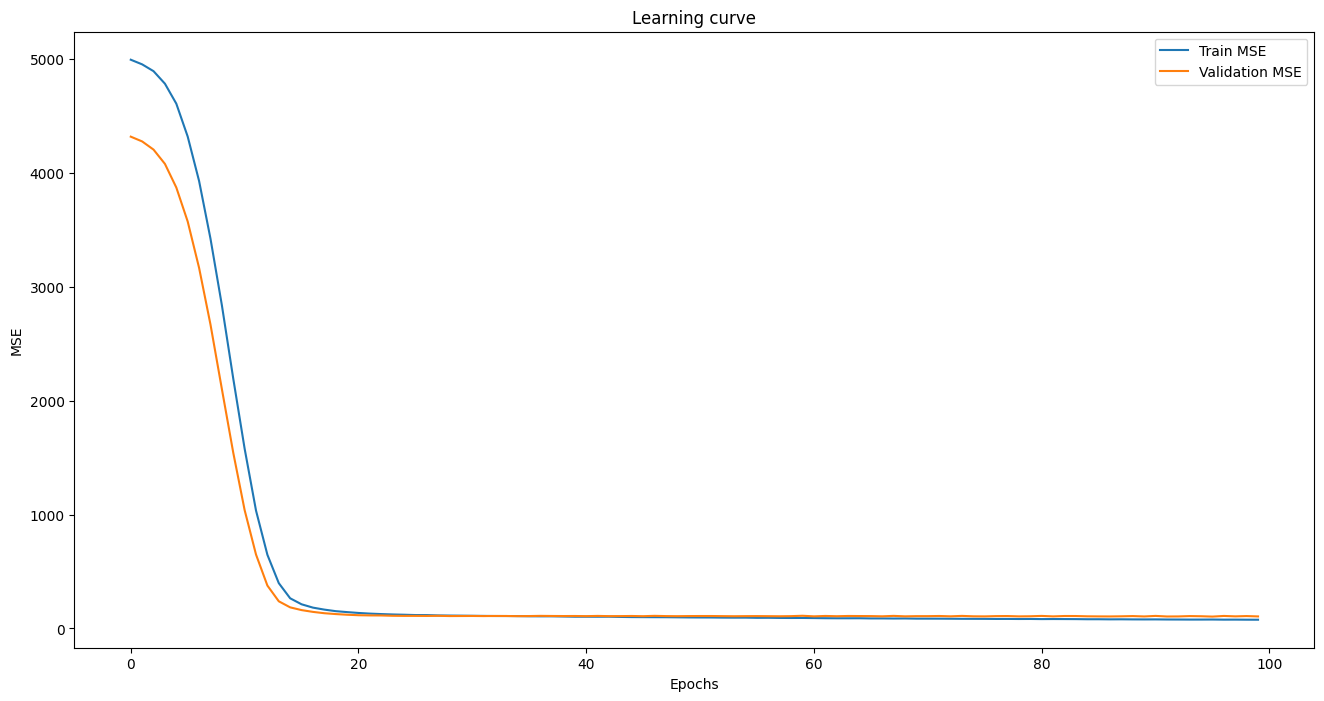

In [35]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Train MSE')
plt.plot(hist.history['val_loss'],label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning curve')
plt.legend()
plt.show()

### EVALUATE THE MODEL

In [36]:
nn.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 6ms/step - loss: 80.8802 - mae: 7.1915


[80.88017272949219, 7.1914873123168945]

In [37]:
nn.evaluate(xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 101.0076 - mae: 8.0809


[101.0075912475586, 8.080946922302246]

### PREDICT THE TRAIN AND TEST DATA

In [38]:
ypred_tr=nn.predict(xtrain)
ypred_ts=nn.predict(xtest)

7/7 [==============================] - 0s 3ms/step


In [45]:
ypred_tr[0:5]

array([[-1.1416662e-01],
       [-2.4324937e+00],
       [-1.1718144e+02],
       [-4.6689102e+01],
       [-4.3603264e+01]], dtype=float32)

In [46]:
ytrain.head()

,Y
29,-5.431758
535,-17.953733
695,-109.987597
557,-45.604222
836,-61.715412


In [47]:
ypred_ts[0:5]

array([[ 42.713272],
       [-89.15303 ],
       [131.50597 ],
       [-54.795944],
       [  9.720379]], dtype=float32)

In [48]:
ytest.head()

,Y
521,48.332745
737,-72.695837
740,139.484176
660,-45.031583
411,1.551620


### R2 score---> REGRESSION

In [49]:
from sklearn.metrics import r2_score

In [50]:
tr_r2=r2_score(ytrain,ypred_tr)
tr_r2

0.9834263340479341

In [51]:
ts_r2=r2_score(ytest,ypred_ts)
ts_r2

0.9791748718188029

### SAVING THE KERAS MODEL FOR FUTURE REFERENCE

In [52]:
nn.save('Regression.keras')

### LOADING THE MODEL BACK

In [53]:
from keras.models import load_model

In [54]:
model=load_model('Regression.keras')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
